**CAPSTONE 2 - EXPLORATORY DATA ANALYSIS**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

In [2]:
path="C:\Local Disk Custom\Edu\Data Science\Springboard\Capstone 2\Ideas and Related datasets\Airline passenger satisfaction"
os.chdir(path) 

filename = 'Airline-Dataset-Clean.csv'
df = pd.read_csv(filename)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(3)

,airline_name,author,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended,time
0,adria-airways,D Ito,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,1,2015-04-01
1,adria-airways,Ron Kuhlmann,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015-01-01
2,adria-airways,E Albin,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,5.0,1,2014-09-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27198 entries, 0 to 27197
Data columns (total 12 columns):
airline_name                     27198 non-null object
author                           27198 non-null object
author_country                   27198 non-null object
cabin_flown                      27198 non-null object
overall_rating                   27198 non-null float64
seat_comfort_rating              27198 non-null float64
cabin_staff_rating               27198 non-null float64
food_beverages_rating            27198 non-null float64
inflight_entertainment_rating    27198 non-null float64
value_money_rating               27198 non-null float64
recommended                      27198 non-null int64
time                             27198 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 2.5+ MB


In [4]:
df.corr()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
overall_rating,1.000000,0.719935,0.775157,0.641722,0.418358,0.831300,0.873337
seat_comfort_rating,0.719935,1.000000,0.601893,0.549970,0.414681,0.706313,0.648004
cabin_staff_rating,0.775157,0.601893,1.000000,0.631894,0.365664,0.710641,0.708900
food_beverages_rating,0.641722,0.549970,0.631894,1.000000,0.501685,0.607359,0.577122
inflight_entertainment_rating,0.418358,0.414681,0.365664,0.501685,1.000000,0.404958,0.367796
value_money_rating,0.831300,0.706313,0.710641,0.607359,0.404958,1.000000,0.767302
recommended,0.873337,0.648004,0.708900,0.577122,0.367796,0.767302,1.000000


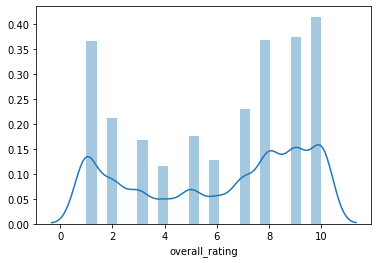

In [5]:
sns.distplot(df['overall_rating'])

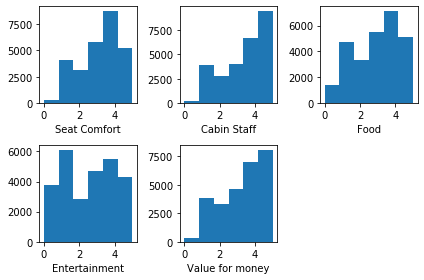

In [6]:
plt.subplot(2,3,1)
plt.hist(df['seat_comfort_rating'], bins=6)
plt.xlabel('Seat Comfort')
plt.subplot(2,3,2)
plt.hist(df['cabin_staff_rating'], bins=6)
plt.xlabel('Cabin Staff')
plt.subplot(2,3,3)
plt.hist(df['food_beverages_rating'], bins=6)
plt.xlabel('Food')
plt.subplot(2,3,4)
plt.hist(df['inflight_entertainment_rating'], bins=6)
plt.xlabel('Entertainment')
plt.subplot(2,3,5)
plt.hist(df['value_money_rating'], bins=6)
plt.xlabel('Value for money')

plt.tight_layout()
plt.show()

All the Feature ratings columns have few 0 Ratings. We will consider them as Null/Missing values and remove them.

In [7]:
df = df[(df['seat_comfort_rating'] != 0) & (df['cabin_staff_rating'] != 0) & (df['food_beverages_rating'] != 0)& (df['inflight_entertainment_rating'] != 0)& (df['value_money_rating'] != 0)]
df.shape

(23032, 12)

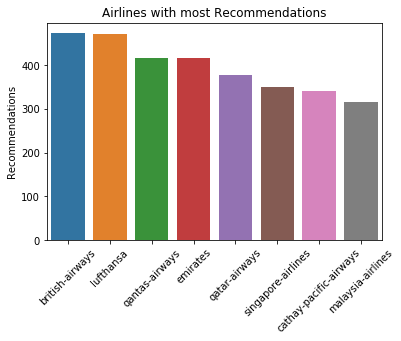

In [8]:
airlines = df[df['recommended']==1].groupby('airline_name')['recommended'].sum().sort_values(ascending=False)
airlines = pd.DataFrame(airlines).reset_index()
sns.barplot(data=airlines.head(8), x='airline_name', y='recommended')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Recommendations')
plt.title('Airlines with most Recommendations')
plt.show()

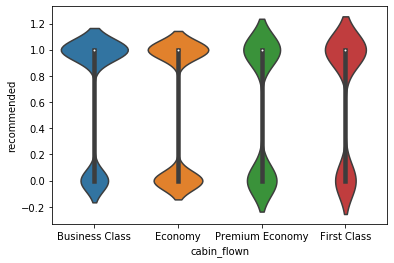

In [9]:
sns.violinplot(x='cabin_flown', y='recommended', data=df)

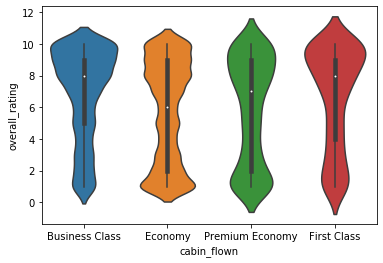

In [10]:
sns.violinplot(x='cabin_flown', y='overall_rating', data=df)

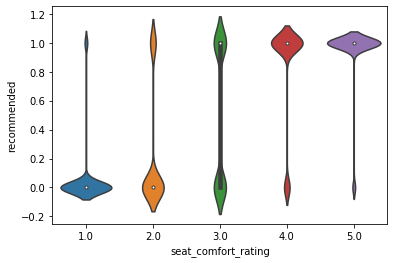

In [11]:
sns.violinplot(x='seat_comfort_rating', y='recommended', data=df)

**Convert cabin_class and author_country columns into numerical values**

In [12]:
#from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['CC'] = labelencoder.fit_transform(df['cabin_flown'])
df['country'] = labelencoder.fit_transform(df['author_country'])

In [13]:
df['cabin_flown'].value_counts()

Economy            16067
Business Class      4955
Premium Economy     1315
First Class          695
Name: cabin_flown, dtype: int64

**Sperate DF object for each Cabin Class to compare the influence of each Flight feature on their Recommendation**

In [14]:
Economy = df[df['CC'] == 1].drop(columns=['cabin_flown', 'CC'])
Bus = df[df['CC'] == 0].drop(columns=['cabin_flown', 'CC'])
PremEcon = df[df['CC'] == 3].drop(columns=['cabin_flown', 'CC'])
First = df[df['CC'] == 2].drop(columns=['cabin_flown', 'CC'])

In [15]:
Comparision = pd.DataFrame(df.corr()['recommended'].drop(columns=['CC']))
Comparision.columns = ['Overall']

In [16]:
Comparision['Economy'] = Economy.corr()['recommended']
Comparision['Bus'] = Bus.corr()['recommended']
Comparision['PremEcon'] = PremEcon.corr()['recommended']
Comparision['First'] = First.corr()['recommended']
Comparision = Comparision.T.drop(columns=['recommended', 'CC'])
Comparision.head()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,country
Overall,0.873897,0.676619,0.734567,0.680182,0.555810,0.793218,-0.014051
Economy,0.878892,0.678335,0.735395,0.673692,0.551623,0.790588,-0.011419
Bus,0.839165,0.628097,0.694593,0.653857,0.506186,0.775906,-0.032222
PremEcon,0.886936,0.722583,0.753778,0.722570,0.636547,0.831594,0.053394
First,0.861435,0.635823,0.740428,0.687342,0.551865,0.799934,-0.057301


**OLS Model** - Not suitable for categorical variable prediction

In [ ]:
X = df2[['overall_rating', 'seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'value_money_rating', 'CC']]
X = X.reset_index().drop(['index'], axis=1)
Y = pd.DataFrame(df2['recommended']).reset_index().drop(['index'], axis=1)
sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
mod = sm.OLS(y_train, X_train)
results = mod.fit()
results.summary()

**Logistic Regression**

In [18]:
X = df[['country', 'CC', 'overall_rating', 'seat_comfort_rating',
         'cabin_staff_rating', 'food_beverages_rating', 'value_money_rating']].values
Y = pd.DataFrame(df['recommended']).reset_index().drop(['index'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17274, 7), (5758, 7), (17274, 1), (5758, 1))

In [19]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

C:\Users\iamku\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iamku\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2162  165]
 [ 145 3286]]


In [21]:
print ("Accuracy : ", np.round(acc, 4))

Accuracy :  0.9462


**Our Logistic Regression model is producing an Accuracy rate of 95.19%. This seems to be a Reliable Model**